# Prediction patient outcome following brain injury

## Introduction
##### **Background**
Traumatic brain injury (TBI) induces a complex play of pathological processes, manifesting as a broad spectrum of symptoms that can impact an individual's memory, thinking and personality. In vivo Magnetic Resonance Spectroscopy (MRS) allows for non-invasive probing of these cerebral metabolic derangements, offering a more refined understanding of the chemistry following injury.

##### **Motivation**
There is a need for establishing an unbiased means for predicting patient symptomatic outcomes at later phases following injury ($\geq$ 6 months). The heterogeneity of TBI is such that treatment for one group may not be suitable for another. Classification of a patient's expected outcome at the acute phase of injury could assist clinicians in selecting a more targeted treatment course for each patient, maximising the probability of improved clinical outcome.

##### **Machine learning in MR medicine: the curse of small data**
Most commonly, very small data sets are acquired for each human MR study due to the difficulty in recruiting patients with pathology. This is further exacerbated when acquiring data from critically injured and fully sedated acute phase TBI patients. These patients need to be surrounded by a team of experts who can provide constant ventilation and monitor for intracranial hypertension. Only a small number of MR sites worldwide have systems in place to scan these critically ill patients, Cambridge's Wolfson Brain Imaging Centre (WBIC) being one. Scaling these data sets into the thousands is thus currently not feasible. Demonstrating reliable machine learning models in predicting patients outcome using very small MRI/MRS data sets is necessary to encourage investment into larger scale multi-site TBI studies with harmonised MR protocols. This will enable machine learning algorithm's ability to predict patient outcome in TBI to flourish.



## Import libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Import my custom functions

In [3]:
import os
import sys
scr_dir = os.path.join(os.getcwd(),'..', 'scr')
sys.path.append(scr_dir)

from d01_dataProc.preProcStov19Data import f_preProcStov19Data
from d01_dataProc.AvAllVoxels import f_AvAllVoxels 
from d01_dataProc.anatomicalVox import f_anatomicalVox
from d01_dataProc.MLPrep import f_MLPrep
from d02_ploting.violinPlot import plot_violin_AvAll, plot_violin_ROI



# Acquisition and processing of data
Following a brain injury the patient is put into the MRI scanner and metabolic information is acquired from different regions of the brain. These regions are segmented into voxels. Each voxels contains a set of features from that voxel. For example brain pH. Data from healthy controls is also acquired. 

Each patient is grouped into one of three classes:
- Unfavourable outcome
- Favourable outcome
- Healthy control

The aim of the project is to create machine learning models that can predict which class a patient will be in 6 months post injury (The data is acquired within 48 hours of injury)

In this analysis two feature set are created: 
 - **Av_All**
    - Where the information across all the voxels is averaged on a per patient basis. See left subfigure below, the green squares define the voxels. 

- **Av_ROI**
    - where the voxels are grouped into regions of brain interests namely the frontal (F), central (C) and parietal (P) brain regions. See left subfigure below. This means that the Av_All feature set has a factor of three times more features than Av_All foreach patient. 


(-0.5, 916.5, 510.5, -0.5)

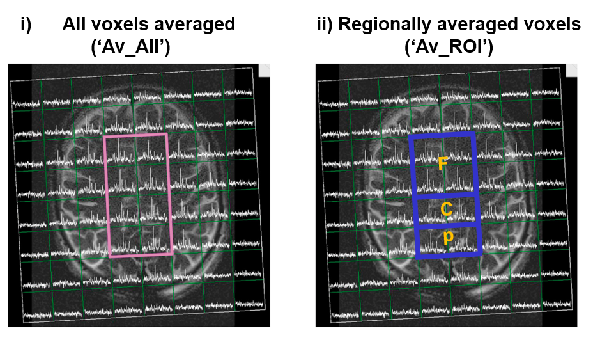

In [5]:
# load descriptor image of where the data is aquired 
import imageio as iio
img = iio.imread('../references/stovel_31P_anatomical.png')
plt.figure(figsize = (120,6))
plt.imshow(img)
plt.axis('off')

Now process the data to generate the features explained above

**Step1 -** 
After processing the raw data from the MRI scanner the data is stored in a CSV file. 

In [8]:
# Import the data and remove redundant information
mrs_i = f_preProcStov19Data()
mrs_i.head()


Code  Voxel  sPCr_sATPg  sPCr_All.1  sATPg_All.1       spH  Outcome_B
0  P01     45    1.188776    0.495850     0.417110  6.981220          0
1  P01     44    1.150838    0.512310     0.445163  6.973530          0
2  P01     37    1.034091    0.458978     0.443847  7.004494          0
3  P01     36    1.132159    0.478140     0.422326  7.068307          0
4  P01     28    0.966667    0.441568     0.456795  7.093024          0

(ref figure below) Make two feature sets. One where all the central eight voxels have been averaged (left figure) and one where the voxel infomration are averaged into regions of interest namely: frontal, central and parietal (right figure)

In [10]:
# Version of the data set where all the voxels are averaged
mrs_i_av = f_AvAllVoxels(mrs_i) 
mrs_i_av.head()


Code  sPCr_sATPg  sPCr_All.1  sATPg_All.1   spH  Outcome_B
0  P01        1.06        0.47         0.45  7.03          0
1  P02        1.10        0.48         0.44  7.02          1
2  P03        1.41        0.52         0.37  7.29          0
3  P04        1.00        0.42         0.42  7.15          0
4  P05        1.09        0.46         0.42  7.10          0

In [11]:
# create a version of the data set where each patient has
# regions of average voxels ('Pariental', 'Central', 'Frontal')
mrs_i_ROI = f_anatomicalVox(mrs_i) 
mrs_i_ROI = f_MLPrep(mrs_i_ROI) # prep ROI data set for ML 
#mrs_i_ROI.iloc[0:3, :]
mrs_i_ROI.head()

C:\Users\My PC\Anaconda3\envs\TBI_PatientOutcomePred_Venv\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Code Outcome_B sPCr_sATPg                     sPCr_All.1  \
Anatomical pos                   Central   Frontal Pariental    Central   
0               P01         0   1.083125  0.968460  1.169807   0.468559   
1               P02         1   0.955384  1.249298  1.029488   0.446524   
2               P03         0   1.390949  1.364203  1.514456   0.548730   
3               P04         0   1.081194  0.974503  0.945363   0.478568   
4               P05         0   1.279272  0.892715  1.085993   0.506067   

                                   sATPg_All.1                           spH  \
Anatomical pos   Frontal Pariental     Central   Frontal Pariental   Central   
0               0.453514  0.504080    0.433086  0.469021  0.431136  7.036401   
1               0.505318  0.464997    0.467868  0.405806  0.451681  7.044047   
2               0.489711  0.529131    0.394153  0.359493  0.352556  7.300956   
3               0.374534  0.436783    0.444864  0.384044  0.462443  7.102437   
4               0.404869  0.455468    0.396776  0.453063  0.424919  7.061053   

                                    
Anatomical pos   Frontal Pariental  
0               7.072348  6.977375  
1               7.004815  7.032077  
2               7.226630  7.358896  
3               7.125732  7.250218  
4               7.131756  7.096405

# Make Violin plots of the data

Here violin plots are made to inspect the differences bewtween the three possible clinical outcomes (heathy control: HC, favourable outcome: fav and unfavourable outcome: unfav) with respect to the features.

#### **Plot Av_All feature set**
Plot the data where are the cental eight voxels have been averaged

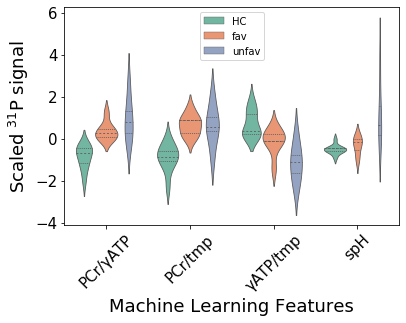

In [12]:
plot_violin_AvAll(mrs_i_av)

#### **Plot Av_ROI feature set**
Plot the data where are the voxels have been averaged into regions of interes (Frontal, Central and parietal)

C:\Users\My PC\Anaconda3\envs\TBI_PatientOutcomePred_Venv\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


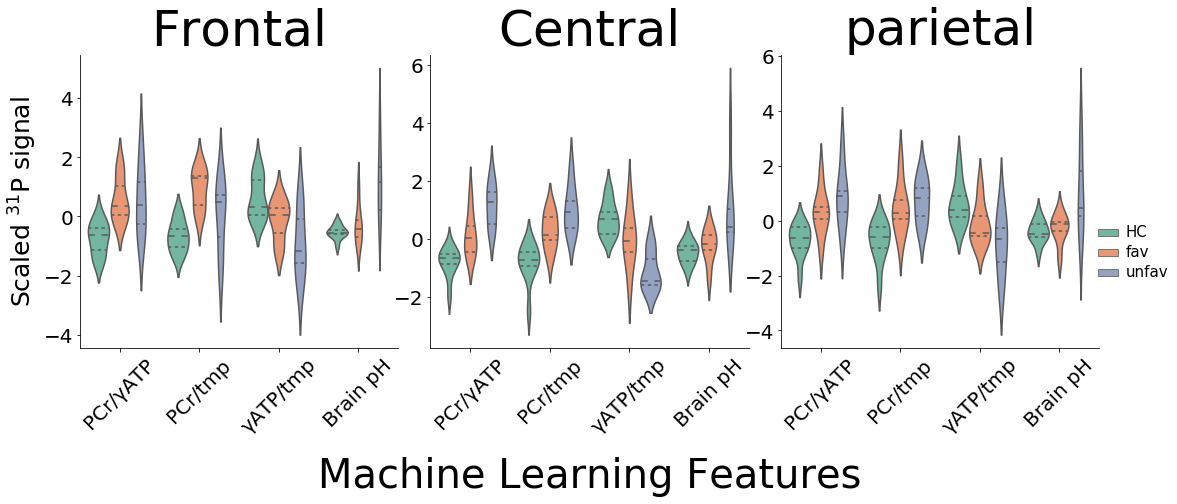

In [13]:
plot_violin_ROI(mrs_i_ROI)

## overview of notebook


- Two feature sets were created:
    - AV_all - where metabolic signals are avaged accross all the voxels, effectively removing spatial infomration
    - AV_ROI - where metabolic signals are averaged into strctural regions of interest namely Frontal, Central and Parietal. This feature set has 3 time that of the Av_all feature set

- The violin plots show that both AV_all and AV_ROI feature sets contains many features where there are differnces between the subgroups we want to predict (favourable outcome, unfavourable outcome and heathy controls)

- See the NB_02_Modeling.ipynb notebook for modeling



The data intermidate files are saved in PATH: '../data/d02_intermediate'. The data folder is however not visible on git. 